$$ x=\sigma \tau$$
$$ y = \frac{1}{2}(\tau^2 - \sigma^2)

In [1]:
import sympy as smp
from sympy.physics.mechanics import *
init_vprinting(pretty_print=True)

t = smp.Symbol('t')
e_t, e_s, ihat, jhat = smp.symbols(r'\hat{\mathbf{e}}_{\tau}, \hat{\mathbf{e}}_{\sigma}, \hat{\mathbf{i}}, \hat{\mathbf{j}}', cls=smp.Function)

\hat{\mathbf{e}}_{\tau}

In [64]:
x, y, tau, sig = smp.symbols('x, y, tau, sigma', cls = smp.Function)
x, y, tau, sig = x(t), y(t), tau(t), sig(t)

In [65]:
e_t = e_t(tau, sig)
e_s = e_s(tau, sig)
ihat = ihat(tau, sig)
jhat = jhat(tau, sig)

display(e_t, e_s)

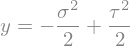

In [67]:
Eqx = smp.Eq(x, sig*tau)
Eqy = smp.Eq(y, smp.Rational(1,2)*(tau**2 - sig**2))
display(Eqx, Eqy)

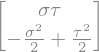

In [80]:
r_cartesian = smp.Matrix([x,y])
r_cartesian_st = r_cartesian.subs({x: Eqx.rhs, y: Eqy.rhs})
r_cartesian_st

$$h_i = \left|\frac{\partial \mathbf{r}}{\partial u_i}\right|$$

In [73]:
drdtau = r_cartesian_st.diff(tau)
drdtau

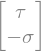

In [74]:
drdsig = r_cartesian_st.diff(sig)
drdsig

In [75]:
h_tau = smp.sqrt((drdtau.T * drdtau)[0])
h_tau

In [76]:
h_sig = smp.sqrt((drdsig.T * drdsig)[0])
h_sig

$$\hat{\mathbf{e}}_i = \frac{1}{h_i} \frac{\partial \mathbf{r}}{\partial u_i}$$

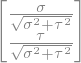

In [77]:
e_tau = drdtau / h_tau
e_tau

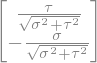

In [53]:
e_sig = drdsig / h_sig
e_sig

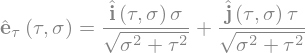

In [54]:
Eq1 = smp.Eq(e_t, ihat * e_tau[0] + jhat * e_tau[1])
Eq1

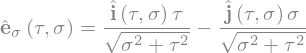

In [55]:
Eq2 = smp.Eq(e_s, ihat * e_sig[0] + jhat * e_sig[1])
Eq2

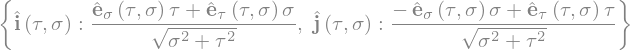

In [56]:
sln = smp.solve([Eq1, Eq2], (ihat, jhat))
sln

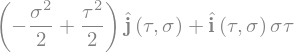

In [79]:
r_cartesian_ij = ihat*r_cartesian_st[0] + jhat*r_cartesian_st[1]
r_cartesian_ij

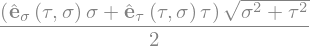

In [84]:
r_parabolic = r_cartesian_ij.subs(sln)
r_parabolic.factor()

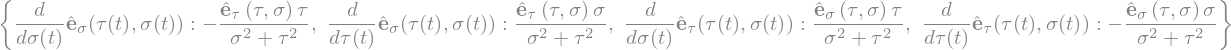

In [90]:
partialderivatives = {smp.diff(e_t, sig): e_s * tau / (tau**2 + sig**2), smp.diff(e_t, tau): -e_s * sig / (tau**2 + sig**2),
                      smp.diff(e_s, sig): -e_t * tau / (tau**2 + sig**2), smp.diff(e_s, tau): e_t * sig / (tau**2 + sig**2)}
partialderivatives

In [95]:
v_parabolic = smp.diff(r_parabolic, t).subs(partialderivatives).factor().simplify()
v_parabolic

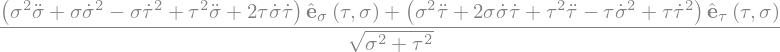

In [92]:
a_parabolic = smp.diff(v_parabolic, t).subs(partialderivatives).simplify().factor(e_t, e_s)
a_parabolic